In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
resfil_raw = pd.read_csv('data/RVU_resfil.csv')
individfil = pd.read_csv('data/RVU_individfil.csv')
resfil_raw = resfil_raw[resfil_raw['dagtyp'] == 1]
individfil = individfil[individfil['dagtyp'] == 1]
resfil_raw['rf3a_ärende'] = resfil_raw.rf3a_ärende.replace(88.0, 14.0)
resfil_raw['rf3a_ärende'] = resfil_raw.rf3a_ärende.fillna(14.0)
resfil_raw['rf3a_ärende'] = resfil_raw['rf3a_ärende'].astype(int)

In [3]:
bins = [6, 15, 19, 24, 44, 64, 999]
age_groups = ['Ald7_15','Ald16_19','Ald20_24','Ald25_44','Ald45_64','Ald65_W'] # 'Ald0_6' are excluded
resfil_raw['age_scb'] = pd.cut(resfil_raw.alder_tab, bins=bins, labels=age_groups)
individfil['age_scb'] = pd.cut(individfil.alder_tab, bins=bins, labels=age_groups)

In [4]:
resfil_raw.loc[:, 'rf2_starttid'] = resfil_raw.rf2_starttid.replace({'99': np.NaN,
                                                                          '18.45': '18:45',
                                                                          '1900-': '19:00',
                                                                          '1 9:4': '19:4'})

#resfil_raw = resfil_raw.dropna()

resfil_raw

,Id,Id_time,förfl_nr,lillam,lillan,storaN,Stratum,mätdag,dagtyp,dagtyp_2,...,kl6_km,bostad_storst_småort_landsby,restyp,individvikt,individvikt_svarandemängd,urval_trompNr,rf1_TrompNr,rf4_TrompNr,filter_$,age_scb
0,1000074.0,10000741.0,1.0,519.0,1608.0,7845.0,27.0,1.0,1.0,1.0,...,4.0,2.0,2.0,8.330817,0.201277,NaN,NaN,NaN,NaN,Ald65_W
1,1000074.0,10000742.0,2.0,519.0,1608.0,7845.0,27.0,1.0,1.0,1.0,...,4.0,2.0,2.0,8.330817,0.201277,NaN,NaN,NaN,NaN,Ald65_W
2,1000116.0,10001161.0,1.0,2118.0,6066.0,25563.0,22.0,1.0,1.0,1.0,...,3.0,3.0,2.0,22.281823,0.538341,NaN,NaN,NaN,NaN,Ald7_15
3,1000116.0,10001162.0,2.0,2118.0,6066.0,25563.0,22.0,1.0,1.0,1.0,...,2.0,3.0,2.0,22.281823,0.538341,NaN,NaN,NaN,NaN,Ald7_15
4,1000116.0,10001163.0,3.0,2118.0,6066.0,25563.0,22.0,1.0,1.0,1.0,...,2.0,3.0,2.0,22.281823,0.538341,NaN,NaN,NaN,NaN,Ald7_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56324,1495043.0,149504310.0,10.0,137.0,323.0,4023.0,8.0,3.0,1.0,1.0,...,1.0,2.0,2.0,21.082328,0.509360,NaN,NaN,NaN,NaN,Ald65_W
56325,1495043.0,149504311.0,11.0,137.0,323.0,4023.0,8.0,3.0,1.0,1.0,...,1.0,2.0,2.0,21.082328,0.509360,NaN,NaN,NaN,NaN,Ald65_W
56326,1551902.0,155190210.0,10.0,220.0,569.0,1120.0,53.0,5.0,1.0,1.0,...,2.0,3.0,2.0,4.394781,0.106180,NaN,NaN,NaN,NaN,Ald45_64
56327,1556554.0,155655410.0,10.0,3123.0,10054.0,219976.0,57.0,5.0,1.0,1.0,...,NaN,1.0,2.0,35.289377,0.852610,1.0,NaN,1.0,0.0,Ald65_W


In [5]:
resfil_raw.index = resfil_raw.Id

In [6]:
resfil_raw

,Id,Id_time,förfl_nr,lillam,lillan,storaN,Stratum,mätdag,dagtyp,dagtyp_2,...,kl6_km,bostad_storst_småort_landsby,restyp,individvikt,individvikt_svarandemängd,urval_trompNr,rf1_TrompNr,rf4_TrompNr,filter_$,age_scb
Id,,,,,,,,,,,,,,,,,,,,,
1000074.0,1000074.0,10000741.0,1.0,519.0,1608.0,7845.0,27.0,1.0,1.0,1.0,...,4.0,2.0,2.0,8.330817,0.201277,NaN,NaN,NaN,NaN,Ald65_W
1000074.0,1000074.0,10000742.0,2.0,519.0,1608.0,7845.0,27.0,1.0,1.0,1.0,...,4.0,2.0,2.0,8.330817,0.201277,NaN,NaN,NaN,NaN,Ald65_W
1000116.0,1000116.0,10001161.0,1.0,2118.0,6066.0,25563.0,22.0,1.0,1.0,1.0,...,3.0,3.0,2.0,22.281823,0.538341,NaN,NaN,NaN,NaN,Ald7_15
1000116.0,1000116.0,10001162.0,2.0,2118.0,6066.0,25563.0,22.0,1.0,1.0,1.0,...,2.0,3.0,2.0,22.281823,0.538341,NaN,NaN,NaN,NaN,Ald7_15
1000116.0,1000116.0,10001163.0,3.0,2118.0,6066.0,25563.0,22.0,1.0,1.0,1.0,...,2.0,3.0,2.0,22.281823,0.538341,NaN,NaN,NaN,NaN,Ald7_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495043.0,1495043.0,149504310.0,10.0,137.0,323.0,4023.0,8.0,3.0,1.0,1.0,...,1.0,2.0,2.0,21.082328,0.509360,NaN,NaN,NaN,NaN,Ald65_W
1495043.0,1495043.0,149504311.0,11.0,137.0,323.0,4023.0,8.0,3.0,1.0,1.0,...,1.0,2.0,2.0,21.082328,0.509360,NaN,NaN,NaN,NaN,Ald65_W
1551902.0,1551902.0,155190210.0,10.0,220.0,569.0,1120.0,53.0,5.0,1.0,1.0,...,2.0,3.0,2.0,4.394781,0.106180,NaN,NaN,NaN,NaN,Ald45_64


In [7]:
resfil_raw = resfil_raw.dropna(subset=['rf2_starttid'])

In [8]:
# from datetime import timedelta, datetime
# # import datetime

# ttype = {}
# times = []
# i = 0
# for ind in resfil_raw.index.unique():
#     person = resfil_raw.loc[ind]
    
#     if type(person) == pd.core.series.Series:
#         df = pd.DataFrame(person).T
#         i += 1
#     else:
#         df = person
#         i += len(person.index)
        
#     print(i)
        
#     for trip in df.itertuples():
#         start_time = trip.rf2_starttid

#         start_time = start_time.split(':')
#         start_time = datetime(year = 1970, month = 1 ,day = 1,hour = int(start_time[0]), minute = int(start_time[1]))
#         start_time = (start_time - datetime(year = 1970, month = 1 ,day = 1,hour = int(0))).seconds
       
#         if trip.rf3a_ärende not in ttype.keys():
#             ttype[trip.rf3a_ärende] = [start_time]*int(trip.individvikt)
#         else:
#             ttype[trip.rf3a_ärende].extend([start_time]*int(trip.individvikt))
            
#         times.append(start_time)

In [9]:
from datetime import timedelta, datetime
# import datetime

times = []
i = 0
for trip in resfil_raw.itertuples():

    start_time = trip.rf2_starttid

    start_time = start_time.split(':')
    start_time = datetime(year = 1970, month = 1 ,day = 1,hour = int(start_time[0]), minute = int(start_time[1]))
    start_time = (start_time - datetime(year = 1970, month = 1 ,day = 1,hour = int(0))).seconds

    times.append(start_time)

In [10]:
start_time = "20:00"
start_time = start_time.split(':')
start_time = datetime(year = 1970, month = 1 ,day = 1,hour = int(start_time[0]), minute = int(start_time[1]))
start_time = (start_time - datetime(year = 1970, month = 1 ,day = 1,hour = int(0))).seconds
start_time

72000

In [11]:
20*3600

72000

In [12]:
resfil_raw['start_time'] = times

/tmp/ipykernel_8254/1209152618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resfil_raw['start_time'] = times


In [13]:
resfil_raw[['start_time', 'rf2_starttid','starttid_timme', 'rf3a_ärende']]

,start_time,rf2_starttid,starttid_timme,rf3a_ärende
Id,,,,
1000074.0,36000,10:00,10.0,8
1000116.0,32400,9:00,9.0,4
1000116.0,35400,9:50,9.0,4
1000116.0,42420,11:47,11.0,4
1000116.0,51540,14:19,14.0,1
...,...,...,...,...
1383249.0,65100,18:05,18.0,12
1461201.0,64800,18:00,18.0,1
1551902.0,63000,17:30,17.0,1


In [14]:
def draw_population(df, weights):
    df2 = df.loc[np.repeat(df.index.values, weights)]
    return df2

In [15]:
upsampled_resfil = draw_population(resfil_raw, resfil_raw.individvikt.astype(int))

In [16]:
distance = np.linspace(1, 86400, int(86400/60))

/tmp/ipykernel_8254/886739211.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde = KernelDensity(kernel='gaussian', bandwidth=60*60).fit(df['start_time'][:, np.newaxis])
/tmp/ipykernel_8254/886739211.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde = KernelDensity(kernel='gaussian', bandwidth=60*60).fit(df['start_time'][:, np.newaxis])
/tmp/ipykernel_8254/886739211.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde = KernelDensity(kernel='gaussian', bandwidth=60*60).fit(df['start_time'][:, np.newaxis])
/tmp/ipykernel_8254/886739211.py:9: FutureWarning: Support fo

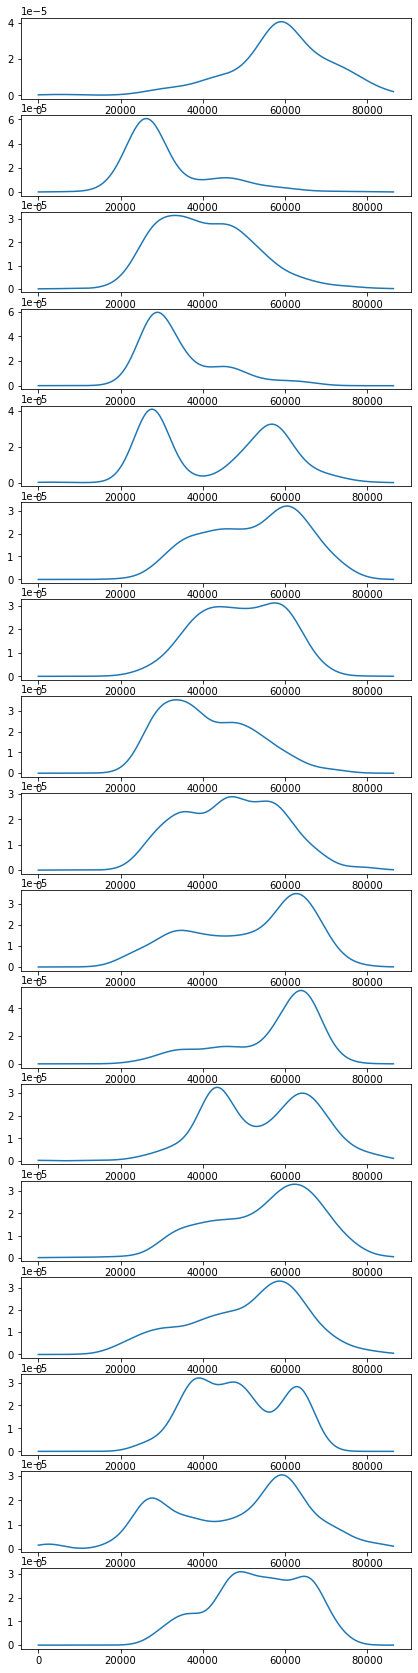

In [69]:
time_type = {}
fig, ax = plt.subplots(nrows=17, figsize=(7,30))
# upsampled_resfil.sample(10000).hist(column=['start_time'], by=['rf3a_ärende'],bins=range(0,86400, 60), density=True, ax=ax)

for axi, ind in zip(ax.flat, range(1,18)):
    df = upsampled_resfil[['start_time', 'rf3a_ärende']][upsampled_resfil['rf3a_ärende']==ind]
#     if len(df.index) > 10000:
#         df = df.sample(10000)
    kde = KernelDensity(kernel='gaussian', bandwidth=60*60).fit(df['start_time'][:, np.newaxis])
    log_dens = kde.score_samples(distance[:, np.newaxis])
    probability = np.exp(log_dens)

    time_type[ind] = probability

    axi.plot(distance, probability)
fig.savefig('data/time-distrs.pdf')
a = pd.DataFrame(time_type)
a.columns = a.columns.astype(str)
a.to_feather('data/time-distr-type.feather')

# The rest is debuging, I think

/tmp/ipykernel_8254/1519249429.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde = KernelDensity(kernel='gaussian', bandwidth=60*60).fit(df['start_time'][:, np.newaxis])


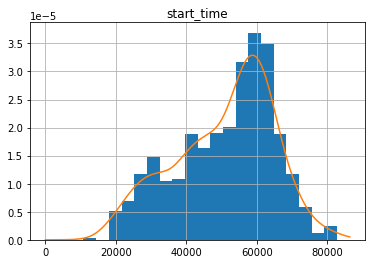

In [61]:
# fig, ax = plt.subplots(nrows=1, figsize=(7,30))
distance = np.linspace(1, 86400, int(86400/60))
df = upsampled_resfil[['start_time', 'rf3a_ärende']][upsampled_resfil['rf3a_ärende']==14]
if len(df.index) > 10000:
    df = df.sample(10000)
ax = df.hist(column=['start_time'], bins=range(0,86400,3600), density=True)
kde = KernelDensity(kernel='gaussian', bandwidth=60*60).fit(df['start_time'][:, np.newaxis])
log_dens = kde.score_samples(distance[:, np.newaxis])
probability = np.exp(log_dens)

ax[0][0].plot(distance, probability)

In [63]:
pd.DataFrame(time_type).to_feather('data/time_distr_type.deather')

ValueError: feather must have string column names

In [67]:
a = pd.DataFrame(time_type)
a.columns = a.columns.astype(str)
a.to_feather('data/time-distr-type.feather')

In [2]:
pd.read_feather('data/time-distr-type.feather')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.363061e-07,6.516500e-08,1.031884e-08,4.488106e-08,2.236009e-07,3.606816e-10,8.176678e-10,4.742830e-10,7.004752e-09,4.703840e-12,1.843810e-14,2.865347e-07,4.736494e-08,2.170383e-10,1.041202e-17,0.000002,1.363705e-20
1,3.399703e-07,6.645439e-08,1.071433e-08,4.601146e-08,2.261108e-07,3.666990e-10,8.491035e-10,4.992388e-10,7.241303e-09,5.070375e-12,2.021318e-14,2.865271e-07,4.817936e-08,2.300867e-10,1.174859e-17,0.000002,1.558716e-20
2,3.436197e-07,6.776354e-08,1.112192e-08,4.715722e-08,2.285999e-07,3.727134e-10,8.815113e-10,5.253616e-10,7.483760e-09,5.464132e-12,2.215312e-14,2.864419e-07,4.899505e-08,2.438546e-10,1.325305e-17,0.000002,1.781123e-20
3,3.472532e-07,6.909258e-08,1.154184e-08,4.831806e-08,2.310670e-07,3.787214e-10,9.149110e-10,5.526976e-10,7.732185e-09,5.887027e-12,2.427263e-14,2.862792e-07,4.981162e-08,2.583775e-10,1.494601e-17,0.000002,2.034705e-20
4,3.508700e-07,7.044165e-08,1.197433e-08,4.949372e-08,2.335108e-07,3.847196e-10,9.493222e-10,5.812941e-10,7.986634e-09,6.341102e-12,2.658769e-14,2.860393e-07,5.062871e-08,2.736924e-10,1.685054e-17,0.000002,2.323750e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2.257721e-06,8.146123e-08,1.205123e-07,1.369419e-10,8.610269e-08,4.162963e-08,2.146314e-08,2.495146e-09,1.675800e-07,6.352232e-08,2.023622e-08,1.263815e-06,4.920724e-07,5.974976e-07,2.650646e-12,0.000001,2.142906e-09
1436,2.219677e-06,7.954619e-08,1.182902e-07,1.299678e-10,8.389298e-08,3.985303e-08,2.082373e-08,2.370975e-09,1.625417e-07,6.127276e-08,1.945581e-08,1.242614e-06,4.830201e-07,5.869131e-07,2.428372e-12,0.000001,2.006336e-09
1437,2.182006e-06,7.765913e-08,1.160905e-07,1.233163e-10,8.172561e-08,3.814403e-08,2.019810e-08,2.252487e-09,1.576155e-07,5.908974e-08,1.870165e-08,1.221575e-06,4.741123e-07,5.764295e-07,2.224155e-12,0.000001,1.877952e-09
1438,2.144709e-06,7.580018e-08,1.139135e-07,1.169741e-10,7.960012e-08,3.650042e-08,1.958615e-08,2.139447e-09,1.528005e-07,5.697177e-08,1.797299e-08,1.200700e-06,4.653455e-07,5.660474e-07,2.036580e-12,0.000001,1.757299e-09
